In [12]:
import pandas as pd
import footyviz
from matplotlib import pyplot as plt

In [13]:
liverpool_data = pd.read_csv('../liverpool2019/liverpool_2019.csv',index_col=('play', 'frame'))
liverpool_data.head()

Unnamed: 0 bgcolor        dx        dy  \
play                          frame                                           
Liverpool [3] - 0 Bournemouth 0               0     NaN  0.000000  0.000000   
                              1               1     NaN  0.185745  1.217580   
                              2               2     NaN  0.178659  1.171133   
                              3               3     NaN  0.171573  1.124685   
                              4               4     NaN  0.164488  1.078238   

                                    edgecolor  player  player_num team  \
play                          frame                                      
Liverpool [3] - 0 Bournemouth 0           NaN       0         NaN  NaN   
                              1           NaN       0         NaN  NaN   
                              2           NaN       0         NaN  NaN   
                              3           NaN       0         NaN  NaN   
                              4           NaN       0         NaN  NaN   

                                             x          y    z  
play                          frame                             
Liverpool [3] - 0 Bournemouth 0      46.394558  11.134454  0.0  
                              1      46.580302  12.352034  0.0  
                              2      46.758961  13.523166  0.0  
                              3      46.930535  14.647852  0.0  
                              4      47.095022  15.726090  0.0

In [14]:
liverpool_passes = pd.read_csv('../liverpool2019/liverpool_2019_passes.csv')
liverpool_passes.head()

,Unnamed: 0,from_team,from_x,from_y,from_frame,from_player_num,to_team,to_x,to_y,to_frame,to_player_num,play
0,0,attack,46.394558,11.134454,0,10.0,attack,48.844160,27.191910,22.0,8.0,Liverpool [3] - 0 Bournemouth
1,1,attack,51.813185,28.611598,42,8.0,attack,85.565258,30.767056,108.0,9.0,Liverpool [3] - 0 Bournemouth
2,2,attack,85.565258,30.767056,108,9.0,attack,86.219036,33.236389,118.0,11.0,Liverpool [3] - 0 Bournemouth
3,0,attack,36.054422,68.277311,16,4.0,attack,82.955888,73.003584,78.0,10.0,Bayern 0 - [1] Liverpool
4,0,attack,47.429230,15.842044,14,26.0,attack,28.497923,7.131785,42.0,10.0,Fulham 0 - [1] Liverpool


In [15]:
#list of goals included in the dataset
liverpool_data.index.get_level_values('play').unique()

Index(['Liverpool [3] - 0 Bournemouth', 'Bayern 0 - [1] Liverpool',
       'Fulham 0 - [1] Liverpool', 'Southampton 1 - [2] Liverpool',
       'Liverpool [2] - 0 Porto', 'Porto 0 - [2] Liverpool',
       'Liverpool [4] - 0 Barcelona', 'Liverpool [1] - 0 Wolves',
       'Liverpool [3] - 0 Norwich', 'Liverpool [2] - 1 Chelsea',
       'Liverpool [2] - 1 Newcastle', 'Liverpool [2] - 0 Salzburg',
       'Genk 0 - [3] Liverpool', 'Liverpool [2] - 0 Man City',
       'Liverpool [1] - 0 Everton', 'Liverpool [2] - 0 Everton',
       'Bournemouth 0 - 3 Liverpool', 'Liverpool [1] - 0 Watford',
       'Leicester 0 - [3] Liverpool'],
      dtype='object', name='play')

In [16]:
play = 'Liverpool [4] - 0 Barcelona'
df = liverpool_data.loc[play]
df.tail()

,Unnamed: 0,bgcolor,dx,dy,edgecolor,player,player_num,team,x,y,z
frame,,,,,,,,,,,
134,2775,red,0.053492,0.002798,white,24771,NaN,attack,81.482130,56.912439,0.0
135,2776,red,0.047360,0.003669,white,24771,NaN,attack,81.529490,56.916108,0.0
136,2777,red,0.041016,0.004583,white,24771,NaN,attack,81.570506,56.920691,0.0
137,2778,red,0.034459,0.005541,white,24771,NaN,attack,81.604964,56.926231,0.0
138,2779,red,0.027689,0.006542,white,24771,NaN,attack,81.632653,56.932773,0.0


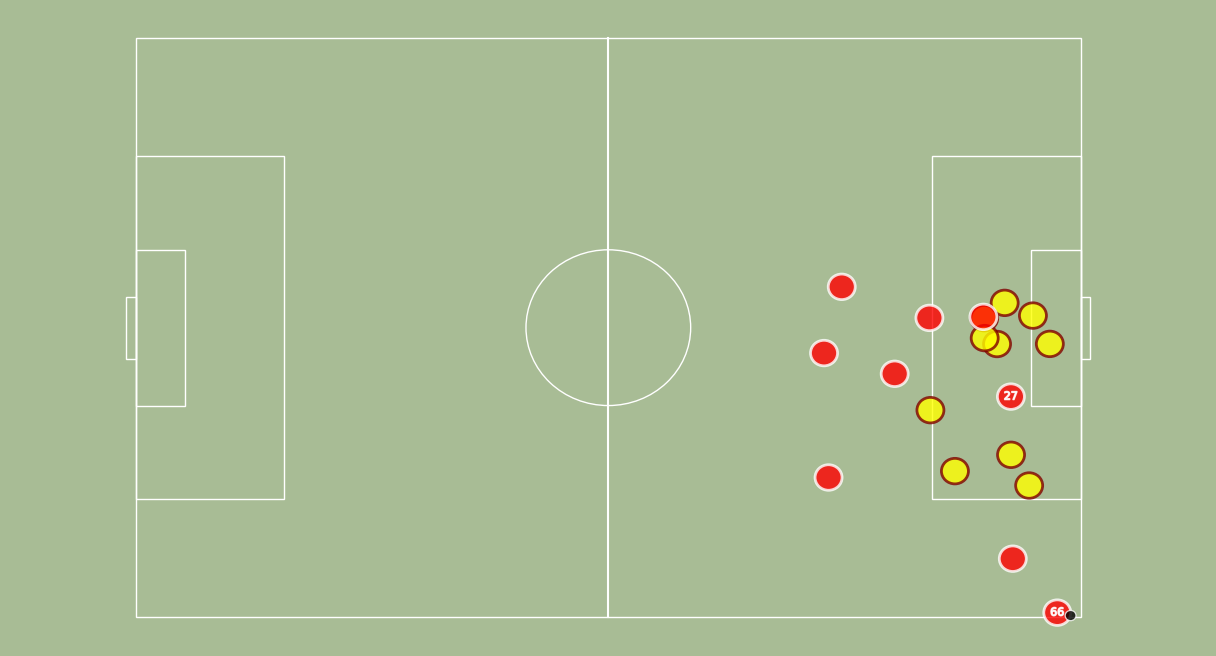

In [17]:
fig, ax, dfFrame = footyviz.draw_frame(df, t=4)

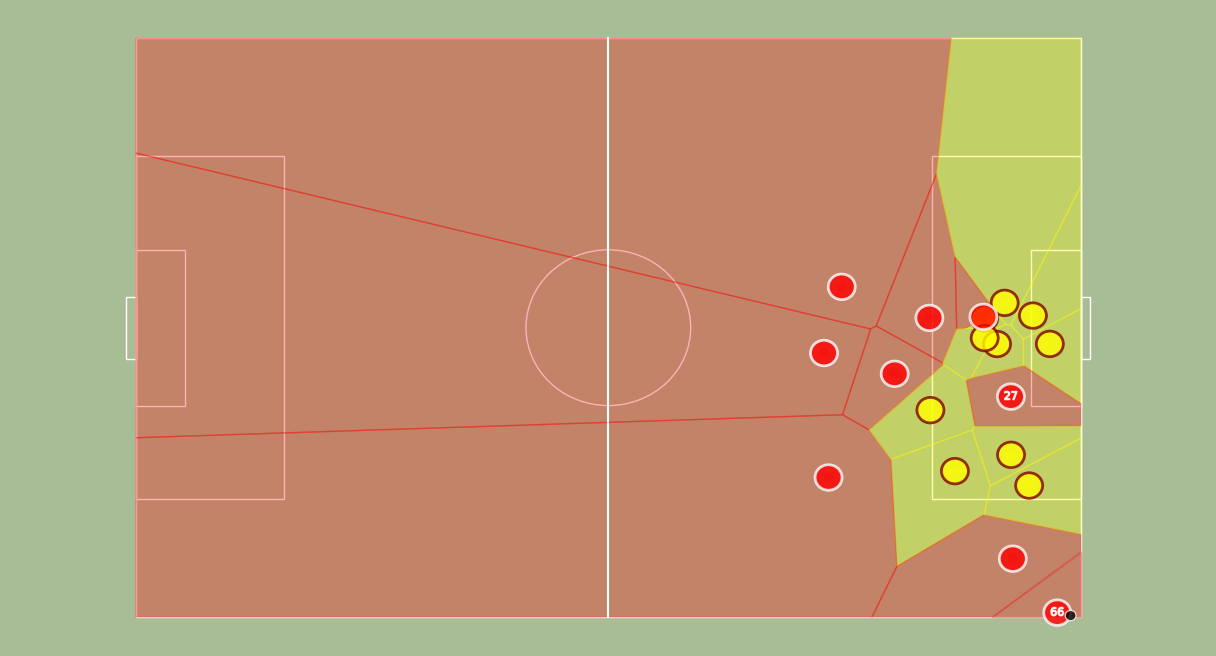

In [18]:
fig, ax, dfFrame = footyviz.draw_frame(df, t=4)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)

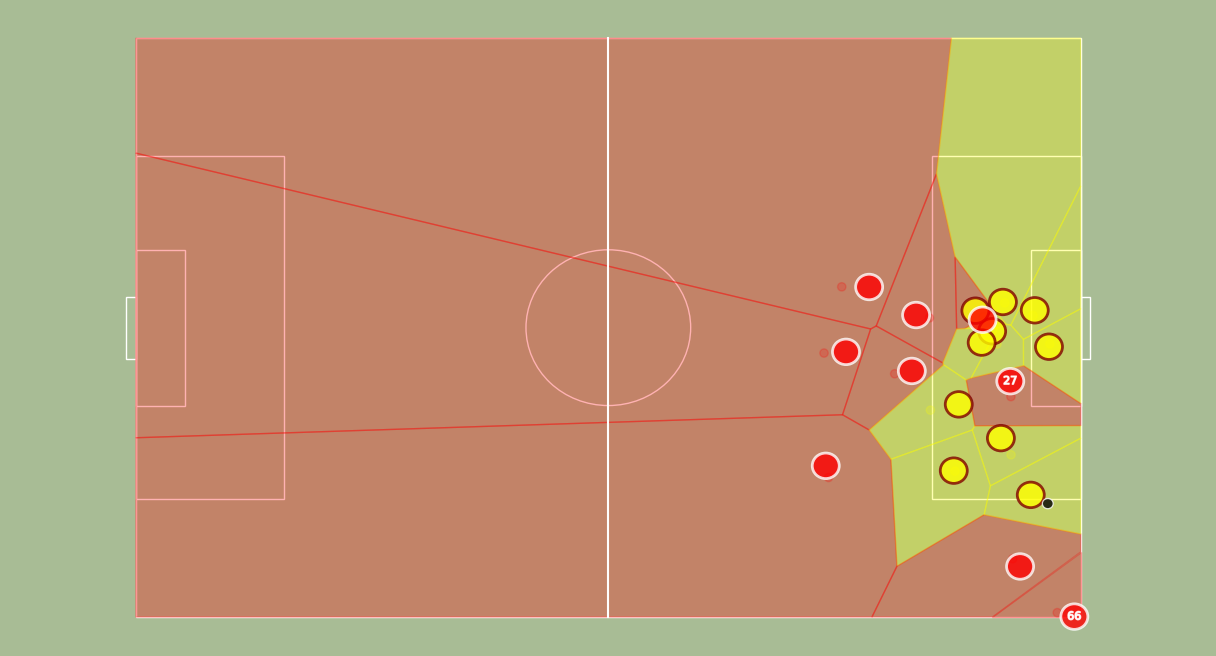

In [19]:
#you can mix different frames for the player's positioning and for the voronoi (e.g. fixing the voronoi to the time of the pass)
fig, ax, dfFrame = footyviz.draw_frame(df, t=5)
dfFrame_for_voronoi = footyviz.get_frame(df, t=4)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame_for_voronoi)

t:   9%|▉         | 13/138 [06:25<00:20,  6.19it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



MemoryError: In RendererAgg: Out of memory

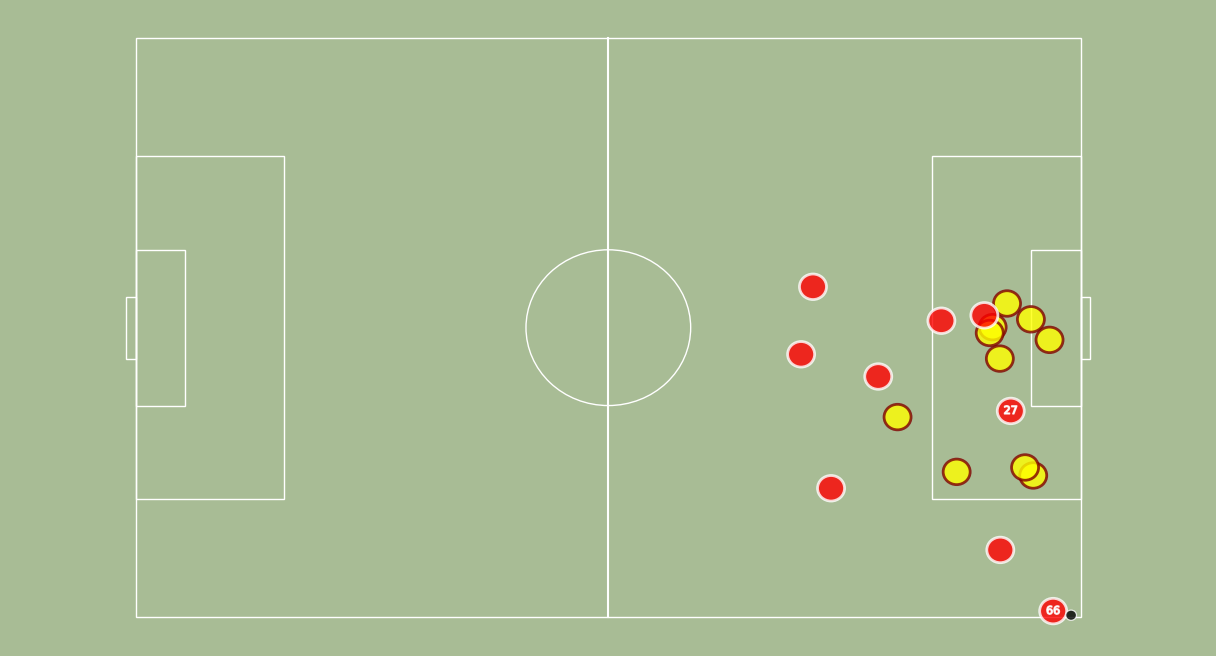

In [20]:
from moviepy import editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage

def draw_frame_x(df, t, fps, voronoi=False):
    fig,ax,dfFrame = footyviz.draw_frame(df, t=t, fps=fps)
    if voronoi:
        fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)
    image = mplfig_to_npimage(fig)
    plt.close()
    return image    

def make_animation(df, fps=20, voronoi=False):
    #calculated variables
    length=(df.index.max()+20)/fps
    clip = mpy.VideoClip(lambda x: draw_frame_x(df, t=x, fps=fps, voronoi=voronoi), duration=length-1).set_fps(fps)
    return clip

clip = make_animation(df)

clip.ipython_display()
clip.write_videofile("../outputs/TrentOrigi.mp4")